In [ ]:
!pip install qiskit
!pip install qiskit[visualization]

In [ ]:
!pip install qiskit-experiments
import qiskit_experiments

In [ ]:
!pip install qiskit-aer

In [ ]:
import qiskit_aer

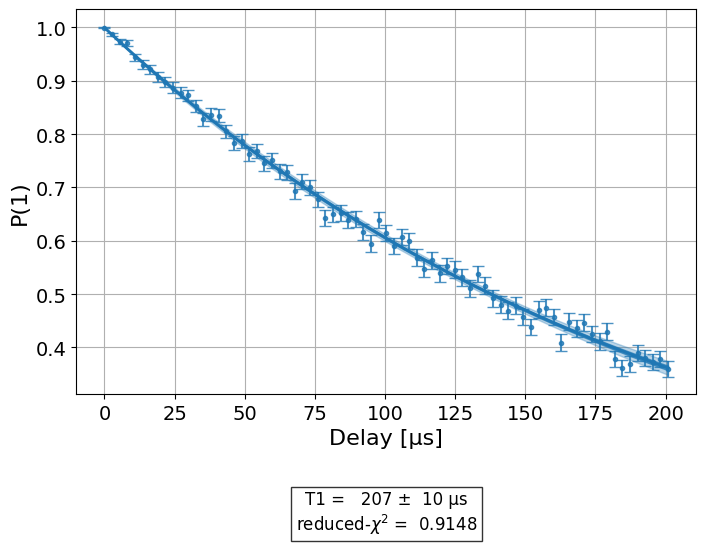

AnalysisResult
- name: @Parameters_T1Analysis
- value: CurveFitResult:
 - fitting method: least_squares
 - number of sub-models: 1
  * F_exp_decay(x) = amp * exp(-x/tau) + base
 - success: True
 - number of function evals: 20
 - degree of freedom: 72
 - chi-square: 65.86582444514269
 - reduced chi-square: 0.9148031172936485
 - Akaike info crit.: -3.740130280232398
 - Bayesian info crit.: 3.2123340603765325
 - init params:
  * amp = 0.6390243902439025
  * tau = 0.00019773675906677803
  * base = 0.36048780487804877
 - fit params:
  * amp = 1.0282056333631986 ± 0.0349410732206717
  * tau = 0.00020725469819764703 ± 1.0037757845561773e-05
  * base = -0.028543372345497173 ± 0.03504216210807424
 - correlations:
  * (amp, base) = -0.9998235573057819
  * (tau, base) = -0.9919619941762543
  * (amp, tau) = 0.9912382006462206
- quality: good
- device_components: ['Q0']
- verified: False
AnalysisResult
- name: T1
- value: 0.000207+/-0.000010
- χ²: 0.9148031172936485
- quality: good
- extra: <1 item

In [33]:
import numpy as np
from qiskit.qobj.utils import MeasLevel
from qiskit_experiments.framework import ParallelExperiment
from qiskit_experiments.library import T1
from qiskit_experiments.library.characterization.analysis.t1_analysis import T1KerneledAnalysis

# A T1 simulator
from qiskit.providers.fake_provider import FakePerth
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel

# A kerneled data simulator
from qiskit_experiments.test.mock_iq_backend import MockIQBackend
from qiskit_experiments.test.mock_iq_helpers import MockIQT1Helper

# Create a pure relaxation noise model for AerSimulator
noise_model = NoiseModel.from_backend(
    FakePerth(), thermal_relaxation=True, gate_error=False, readout_error=False
)

# Create a fake backend simulator
backend = AerSimulator.from_backend(FakePerth(), noise_model=noise_model)

# Look up target T1 of qubit-0 from device properties
qubit0_t1 = FakePerth().qubit_properties(0).t1


# Time intervals to wait before measurement
#dt_times = np.linspace(0, 1332000, 75)
delays = np.linspace(0, 1*qubit0_t1, 75)
#delays = np.arange(1e-6, 3 * qubit0_t1, 3e-5)
# Create an experiment for qubit 0
# with the specified time intervals
exp = T1(physical_qubits=(0,), delays=delays)

# Set scheduling method so circuit is scheduled for delay noise simulation
exp.set_transpile_options(scheduling_method='asap')


# Run the experiment circuits and analyze the result
exp_data = exp.run(backend=backend, seed_simulator=101).block_for_results()
#exp_data.save() # this is not working


# Print the result
display(exp_data.figure(0))
for result in exp_data.analysis_results():
    print(result)
